Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'firing rate (Hz)')

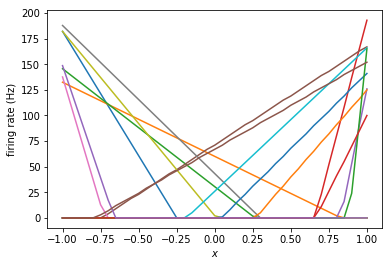

In [1]:
#Question 1.1a
%pylab inline
from BaseNeuron import BaseNeuron
from RectifiedLinear import RectifiedLinear
import numpy as np

#num neurons
N = 16

#Array of encoders
es = np.random.choice([-1, 1], size=N)

xInts = np.random.uniform(-0.95, 0.95, N)
max_rates = np.random.uniform(100, 200, N)

slope = max_rates / (es - xInts);
biases = -1*slope*xInts;
gains = abs(slope)

x = np.arange(-1,1.05,0.05)
A = np.zeros(shape=(size(x),N))

for i in range(0, N):
    neuron = RectifiedLinear(gains[i], biases[i], es[i]);
    a = neuron.tuningSimple(x)
    A[:, i] = a

pyplot.plot(x, A)
xlabel('$x$')
ylabel('firing rate (Hz)')

In [2]:
#Question 1.1b
A_t = A.transpose() 

D = np.dot(np.linalg.inv(np.dot(A_t, A)), np.dot(A_t, x))
print ("The decoders are: ")
print(D)

The decoders are: 
[ -1.17387022e-04  -1.66101334e-04  -5.15862705e-03   9.52414978e-05
  -5.65657404e-05   2.08438784e-03  -6.34428034e-04  -4.30453757e-04
  -3.62446776e-04   2.62861953e-04   3.94649436e-04   3.79738012e-03
   4.15423812e-05  -1.26317879e-04   1.99029599e-04   4.78170299e-04]


RMSE 0.00094115


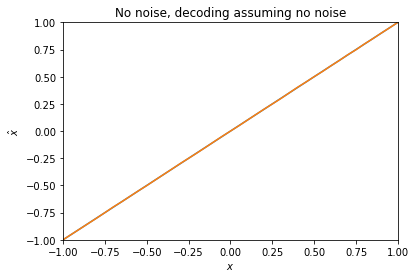

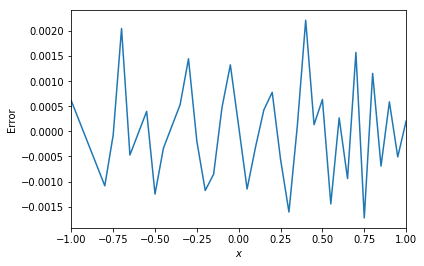

In [3]:
#Question 1.1c
xhat = np.dot(A, D)
error = xhat - x

figure()
title('No noise, decoding assuming no noise')
plot(x, x)
plot(x, xhat)
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE = np.sqrt(np.average(error**2))
print('RMSE %g' % RMSE)

RMSE 0.118357


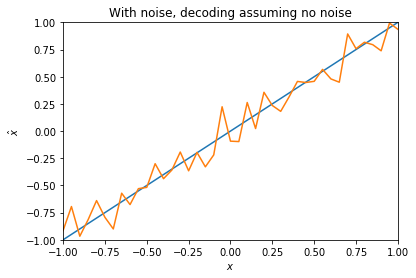

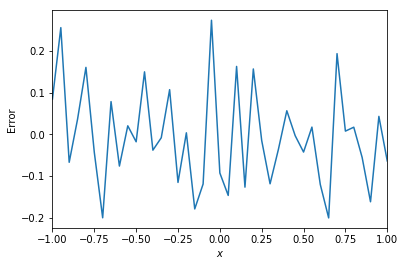

In [4]:
#Question 1.1d, now with noise!

An = A + np.random.normal(scale=0.2*np.max(A), size=shape(A))
    
An_t = An.transpose() 
D2 = np.dot(np.linalg.inv(np.dot(An_t, An)), np.dot(An_t, x))

xhat2 = np.dot(An, D2)
error2 = xhat2 - x

figure()
plot(x, x)
plot(x, xhat2)
title('With noise, decoding assuming no noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error2)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE2 = np.sqrt(np.average(error2**2))
print('RMSE %g' % RMSE2)

With noise, decoding accounting for noise
RMSE 0.118357
Without noise, decoding accounting for noise
RMSE 0.00162854


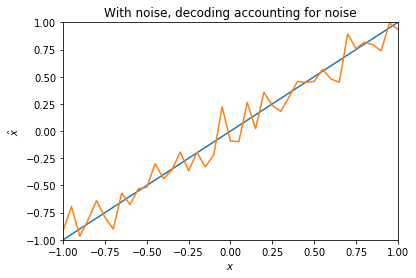

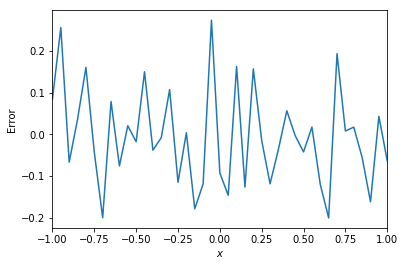

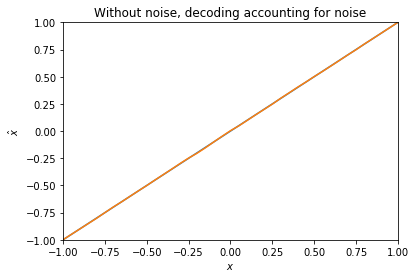

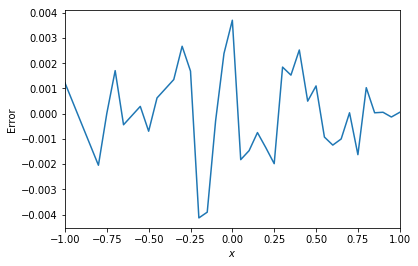

In [5]:
#Question 1.1e
sigma = 0.2
S = size(x)

D3 = BaseNeuron.decode(An, x, sigma, S)
D4 = BaseNeuron.decode(A, x, 0, S)

xhat3 = np.dot(An, D3)
xhat4 = np.dot(A, D4)
error3 = xhat3 - x
error4 = xhat4 - x

figure()
plot(x, x)
plot(x, xhat3)
title('With noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error3)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

print("With noise, decoding accounting for noise")
RMSE3 = np.sqrt(np.average(error3**2))
print('RMSE %g' % RMSE3)

figure()
plot(x, x)
plot(x, xhat4)
title('Without noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error4)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

print('Without noise, decoding accounting for noise')
RMSE4 = np.sqrt(np.average(error4**2))
print('RMSE %g' % RMSE4)

Text(0,0.5,'firing rate (Hz)')

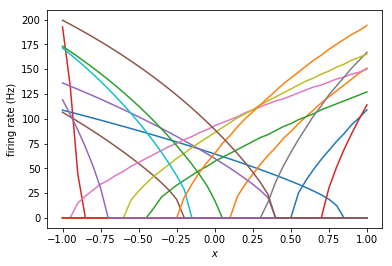

In [6]:
#Question 1.3a
from LIF import LIF

#num neurons
N = 16

es = np.random.choice([-1, 1], size=N) #Array of encoders
xInts = np.random.uniform(-0.95, 0.95, N)
max_rates = np.random.uniform(100, 200, N)

x = np.arange(-1,1.05,0.05)
A = np.zeros(shape=(size(x),N))

for i in range(0, N):
    neuron = LIF(0, 0, es[i]);
    neuron.setParams(es[i], max_rates[i], xInts[i])
    a = neuron.tuningSimple(x)
    A[:, i] = a

figure()
pyplot.plot(x, A)
xlabel('$x$')
ylabel('firing rate (Hz)')

RMSE 0.0565489
RMSE 0.00688384


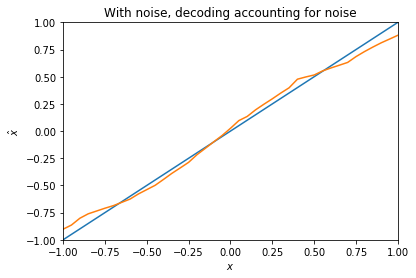

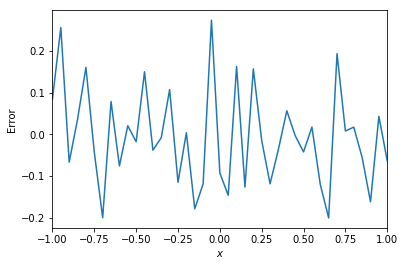

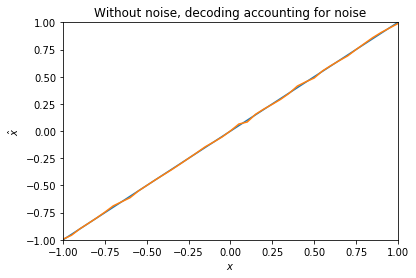

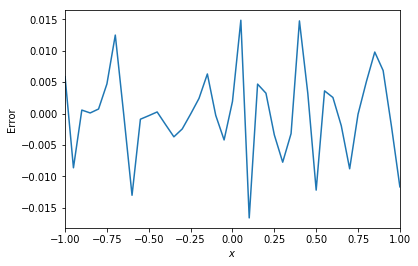

In [7]:
#Questions 1.3b
sigma = 0.2
S = size(x)

An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))

D = BaseNeuron.decode(An, x, sigma, S)
D2 = BaseNeuron.decode(A, x, 0, S)

xhat = np.dot(A, D)
xhat2 = np.dot(A, D2)
error = xhat - x
error2 = xhat2 - x

figure()
plot(x, x)
plot(x, xhat)
title('With noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error3)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE = np.sqrt(np.average(error**2))
print('RMSE %g' % RMSE)

figure()
plot(x, x)
plot(x, xhat2)
title('Without noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error2)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE2 = np.sqrt(np.average(error2**2))
print('RMSE %g' % RMSE2)

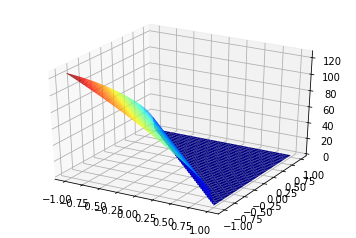

In [25]:
#Question 2.1a
e_pref = (-1./np.sqrt(2), -1./np.sqrt(2))
neuron = LIF(0, 0, e_pref);
neuron.setParams(e_pref, 100, (0,0))

X,Y = np.mgrid[-1:1.05:0.05, -1:1.05:0.05]
xy = np.vstack((X.flatten(), Y.flatten())).T

A = neuron.tuningSimple(xy)
A2 = reshape(A,X.shape)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
p = ax.plot_surface(X, Y, A2, linewidth=1, cstride=1, rstride=1, cmap=pylab.cm.jet)

In [ ]:
#Question 2.1b

In [32]:
#Question 2.3a
angles = np.random.uniform(0, 2*np.pi,100)
def unitVector(x):
    return (cos(x), sin(x))

X, Y = unitVector(angles)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
p = ax.plot_surface(X, Y, A2, linewidth=1, cstride=1, rstride=1, cmap=pylab.cm.jet)

(100,)
